In [33]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [12]:
data = pd.read_csv("bank-additional.csv", sep=';')

In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [15]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Preprocessing

Melakukan label Encoding untuk variabel kategories

In [20]:
label_encoder = LabelEncoder()
categorical_numbers = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_numbers:
    data[col] = label_encoder.fit_transform(data[col])

Kemudian melakukan menentukan fitur x dengan target ke y

In [21]:
X = data.drop('y', axis=1)
y = data['y']

selanjutnya melakukan proses training dan test pada data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_train,y_train)

C:\Users\Zulfi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
pred_test=model.predict(X_test)
print(accuracy_score(y_test,pred_test))
matrix=confusion_matrix(y_test,pred_test)
print(matrix)

0.904126213592233
[[711  21]
 [ 58  34]]


diatas menjelaskan accuracy_scorenya memiliki nilai yang bagus dan matrix confusion sangat tinggi

# Visualization Logistic Regression 

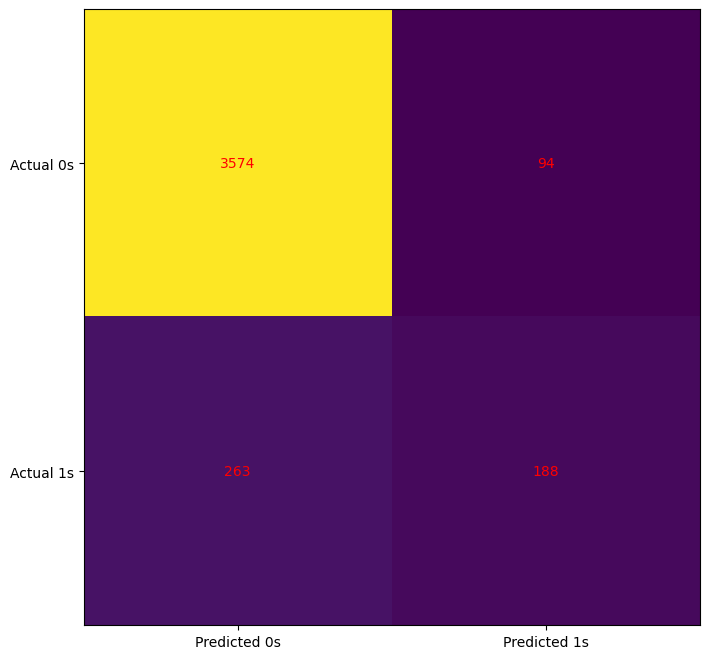

In [34]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# DECISION TREE

In [35]:
#import decision tree dari library
from sklearn import tree

Selanjutnya melakukan train menggunakan decision treee

In [36]:
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

Melakukan prediksi menggunakan accuracy_score dan confusion_matrix

In [38]:
pred_test1=dt.predict(X_test)
print(accuracy_score(y_test,pred_test1))
matrix1=confusion_matrix(y_test,pred_test1)
print(matrix1)

0.875
[[676  56]
 [ 47  45]]


Hasil diatas menyebutkan bahwa nilai accuracy score memiliki 0.875 dan confusion matrix [[676 56] , [47  45]]  keduanya memiliki nilai yang besar

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
pred_test2=rf.predict(X_test)
print(accuracy_score(y_test,pred_test2))
matrix2=confusion_matrix(y_test,pred_test2)
print(matrix2)

0.9004854368932039
[[706  26]
 [ 56  36]]


# SVM

In [49]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [50]:
pred_test3=svm_model.predict(X_test)
print(accuracy_score(y_test,pred_test3))
matrix3=confusion_matrix(y_test,pred_test3)
print(matrix3)

0.8992718446601942
[[722  10]
 [ 73  19]]


# NAIVE BAYES ALGORITHM

In [56]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [58]:
pred_test4=nb.predict(X_test)

print(accuracy_score(y_test,pred_test4))
matrix4=confusion_matrix(y_test,pred_test4)
print(matrix4)

0.8543689320388349
[[651  81]
 [ 39  53]]


# K-NEAREST NEIGHBOR(kNN) ALGORITHM


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [62]:
from sklearn.neighbors import KNeighborsClassifier
#Membuat model
kNN=KNeighborsClassifier(n_neighbors = 5)
#Melatih Model
kNN.fit(X_train,y_train)

KNeighborsClassifier()

In [79]:
#Membuat prediksi
pred_test5 =kNN.predict(X_test.values)
accuracy = accuracy_score(y_test, pred_test5)
classification_rep = classification_report(y_test, pred_test5)
print(accuracy_score(y_test,pred_test5))
matrix5=confusion_matrix(y_test,pred_test5)
print(matrix5)


0.8883495145631068
[[696  36]
 [ 56  36]]


C:\Users\Zulfi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Visualization KNN

C:\Users\Zulfi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Zulfi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Zulfi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Zulfi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Zulfi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Zulfi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWa

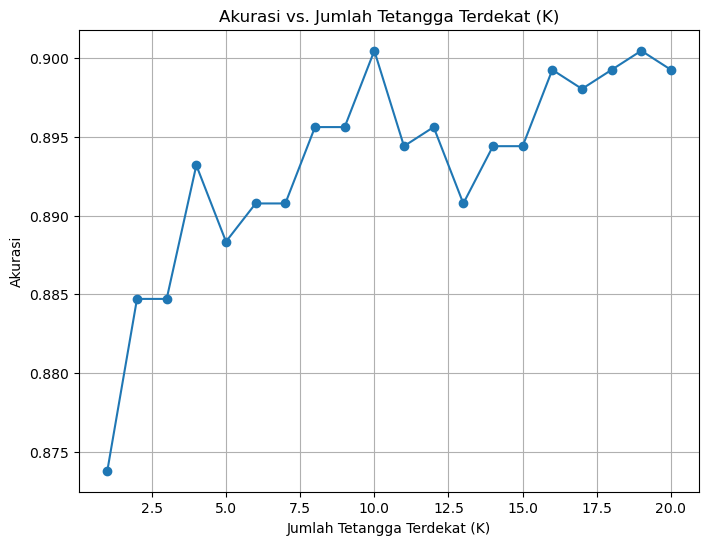

In [80]:
# Langkah 9: Membuat Grafik Plot
plt.figure(figsize=(8, 6))

# Menghitung jumlah tetangga terdekat yang memberikan akurasi terbaik
accuracy_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_test5 = knn.predict(X_test.values)
    accuracy = accuracy_score(y_test, pred_test5)
    accuracy_list.append(accuracy)

# Plot
plt.plot(range(1, 21), accuracy_list, marker='o')
plt.title('Akurasi vs. Jumlah Tetangga Terdekat (K)')
plt.xlabel('Jumlah Tetangga Terdekat (K)')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()